# Inequality simulations

Run some simulations that explore inequality on networks. 

# Preliminaries

In [37]:
# load some packages
import networkx as nx
import numpy as np
from scipy.stats import entropy
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Classes

## Erdos-Renyi Inequality

In [28]:
class EREqualitySimulation:
  def __init__(self, n, p, simulation_runs):
    self.n = n
    self.p = p
    self.simulation_runs = simulation_runs
    self.graph = nx.erdos_renyi_graph(n, p)
    self.resources = np.ones(n)  # Start with 1 resource per node

  def run_simulation(self):
    for _ in range(self.simulation_runs):
      for node in range(self.n):
        if self.resources[node] > 0:  # Check if the node has resources
          neighbors = list(self.graph.neighbors(node))
          if neighbors:  # Check if the node has neighbors
            chosen_neighbor = np.random.choice(neighbors)
            self.resources[node] -= 1
            self.resources[chosen_neighbor] += 1

  def compute_measures(self):
    # Entropy
    probs = self.resources / np.sum(self.resources)
    entropy_val = entropy(probs)

    # Gini Coefficient
    sorted_resources = np.sort(self.resources)
    index = np.arange(1, self.n+1)
    n = self.n
    gini_val = (np.sum((2 * index - n - 1) * sorted_resources)) / (n * np.sum(sorted_resources))

    # Herfindahl Index
    herfindahl_index = np.sum((self.resources / np.sum(self.resources)) ** 2)

    return entropy_val, gini_val, herfindahl_index

# Run simulations

## Erdos-Renyi network inequality

### Basic tests

In [29]:
# Example of using the class
simulation = EREqualitySimulation(n=100, p=0.1, simulation_runs=1000)
simulation.run_simulation()
entropy_val, gini_val, herfindahl_index = simulation.compute_measures()

entropy_val, gini_val, herfindahl_index


(3.1038159185111462, 0.764, 0.113)

### Grid analysis

In [30]:
# define the parameter grid
n_values = np.linspace(10, 200, 100, dtype=int)
p_values = np.linspace(0, 1, 100)

In [31]:
# list to store the results
results_df = []

In [32]:
# run simulations over the grid of n and p values
for n in tqdm(n_values, desc='N Progress'):
  for p in tqdm(p_values, desc='P Progress', leave=False):
    # Initialize and run the simulation
    simulation = EREqualitySimulation(n=int(n), p=float(p), simulation_runs=100)
    simulation.run_simulation()
    entropy_val, gini_val, herfindahl_index = simulation.compute_measures()
    
    # Save the results as a list
    results_df.append({
      'n': n,
      'p': p,
      'entropy': entropy_val,
      'gini_coefficient': gini_val,
      'herfindahl_index': herfindahl_index
    })

N Progress: 100%|██████████| 100/100 [10:00<00:00,  6.00s/it]


In [33]:
# convert the list of results to a DataFrame
results_df = pd.DataFrame(results_df)

In [34]:
# inspect
results_df

,n,p,entropy,gini_coefficient,herfindahl_index
0,10,0.000000,2.302585,0.00000,0.10000
1,10,0.010101,2.302585,0.00000,0.10000
2,10,0.020202,2.302585,0.00000,0.10000
3,10,0.030303,2.302585,0.00000,0.10000
4,10,0.040404,2.302585,0.00000,0.10000
...,...,...,...,...,...
9995,200,0.959596,4.581232,0.59720,0.01190
9996,200,0.969697,4.395290,0.66845,0.01560
9997,200,0.979798,4.410997,0.66460,0.01480
9998,200,0.989899,4.420826,0.66115,0.01475


In [35]:
# prepare for plotting
results_pivot_entropy = results_df.pivot("n", "p", "entropy")
results_pivot_gini = results_df.pivot("n", "p", "gini_coefficient")
results_pivot_herfindahl = results_df.pivot("n", "p", "herfindahl_index")

/var/folders/nf/kbvr_jm57wdbhg4cc5f4n2zh0000gq/T/ipykernel_37221/739209671.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  results_pivot_entropy = results_df.pivot("n", "p", "entropy")
/var/folders/nf/kbvr_jm57wdbhg4cc5f4n2zh0000gq/T/ipykernel_37221/739209671.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  results_pivot_gini = results_df.pivot("n", "p", "gini_coefficient")
/var/folders/nf/kbvr_jm57wdbhg4cc5f4n2zh0000gq/T/ipykernel_37221/739209671.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  results_pivot_herfindahl = results_df.pivot("n", "p", "herfindahl_index")


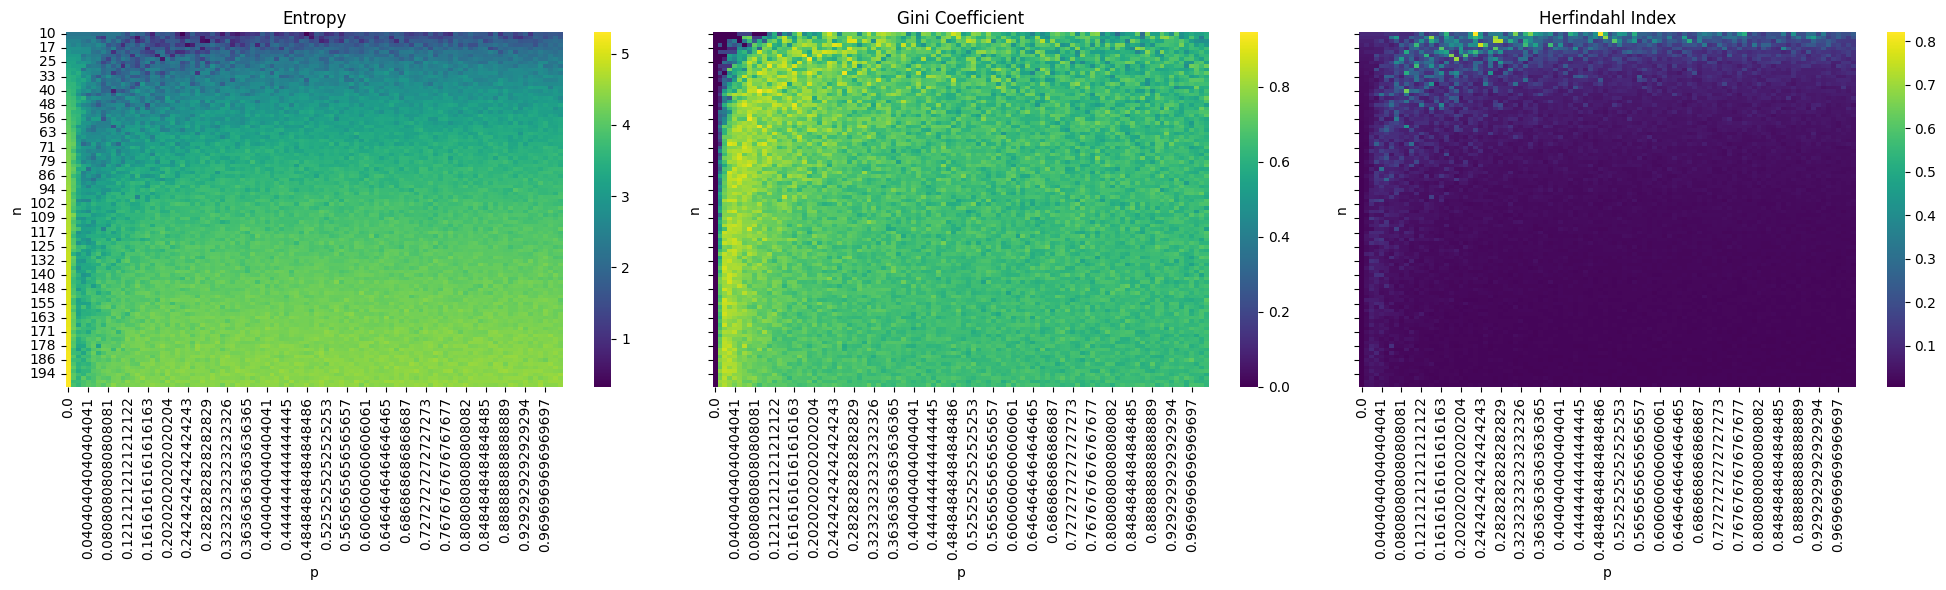

In [38]:
# initialize the plot
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# entropy
sns.heatmap(results_pivot_entropy, ax=axs[0], cmap="viridis")
axs[0].set_title('Entropy')

# gini
sns.heatmap(results_pivot_gini, ax=axs[1], cmap="viridis")
axs[1].set_title('Gini Coefficient')

# herfindahl
sns.heatmap(results_pivot_herfindahl, ax=axs[2], cmap="viridis")
axs[2].set_title('Herfindahl Index')

# set axes
for ax in axs:
    ax.set_xlabel('p')
axs[0].set_ylabel('n')

plt.tight_layout()
plt.show()